# POP OpenMP Metrics with PyPOP and Extrae

Pypop is designed to automate the process of calculating the POP metrics, making the process fast and efficient while still providing the user with flexibility to modify the workflow as necessary for the particular task at hand.

Pypop uses Pandas DataFrames internally as they are fast, flexible, and allow the user to trivially access and use the data in their own scripts as needed.

## Setting up

Setting up pypop requires installing pypop using `setup.py` or `pip`, and making sure that the `Paramedir` and `Dimemas` binaries are available and ideally on the system `$PATH`.

In [1]:
import os
import sys

# Import the functions needed to calculate the standard MPI metrics
from pypop.traceset import TraceSet
from pypop.metrics import OpenMP_Metrics

# If Paramedir or Dimemas are not on your PATH, you can set their directories below

#from pypop.config import set_dimemas_path, set_paramedir_path
#set_paramedir_path('/path/to/paramedir/bin/')
#set_dimemas_path('/path/to/dimemas/bin')

## Traces

Traces should be captured using Extrae in the normal way.  Pypop features transparent support for gzip'ed traces, and compressed traces are recommended for systems with low I/O speeds such as those with network based storage.

The traces for this example are captured for the open source [EPOCH](https://cfsa-pmw.warwick.ac.uk/users/sign_in) PIC code (2D variant) using the input.deck file provided in the trace folder.
 
Assuming the traces were copied along with the example notebook, we can set the trace directory location to:

In [2]:
trace_directory = './imagemagick_example_traces/'

## Analysis

Start by finding all the `*.prv` tracefiles in the analysis directory, and the create a TraceSet which uses Paramedir and Dimemas to calculate the statistics. Although it is not used in this case, PyPOP does provide support for cutting traces to the ROI based on the presence of EXTRAE_START and EXTRAE_STOP events.

In [4]:
# Make a list of the tracefiles that we want
trace_files = [os.path.join(trace_directory, f) for f in os.listdir(trace_directory) if f.endswith(('.prv','.prv.gz'))]

# Use paramedir to calculate the statistics
statistics = TraceSet(trace_files)
display(statistics)

A Jupyter Widget

The metrics can then be calculated from the statistics list, in this case, we organise by MPI commsize.  Note that the metrics calculated here include the speedup and raw runtime for comparision purposes.  The data is in the form of a Pandas DataFrame.

In [5]:
metrics = OpenMP_Metrics(statistics.by_threads_per_process())
display(metrics)

,Number of Processes,OpenMP Region Efficiency,Serial Region Efficiency,Parallel Efficiency,IPC Scaling,Instruction Scaling,Frequency Scaling,Computational Scaling,Global Efficiency,Speedup,Runtime
1,1.0,0.998414,1.000000,0.995348,1.000000,1.000000,1.000000,1.000000,0.995348,1.000000,1.474657e+10
2,2.0,0.998448,0.728963,0.723112,1.033760,0.999995,0.988037,0.977705,0.706990,1.420588,1.038061e+10
4,4.0,0.995565,0.498454,0.488539,0.988716,0.999995,0.932716,0.875288,0.427612,1.718442,8.581358e+09
6,6.0,0.951526,0.438806,0.384788,0.822290,0.999995,0.913411,0.739129,0.284408,1.714422,8.601480e+09
8,8.0,0.957615,0.373220,0.325171,0.796799,0.999994,0.910853,0.717507,0.233313,1.875224,7.863894e+09


## Visualising the metrics

These metrics can then be simply visualised using the inbuilt plotting routines:

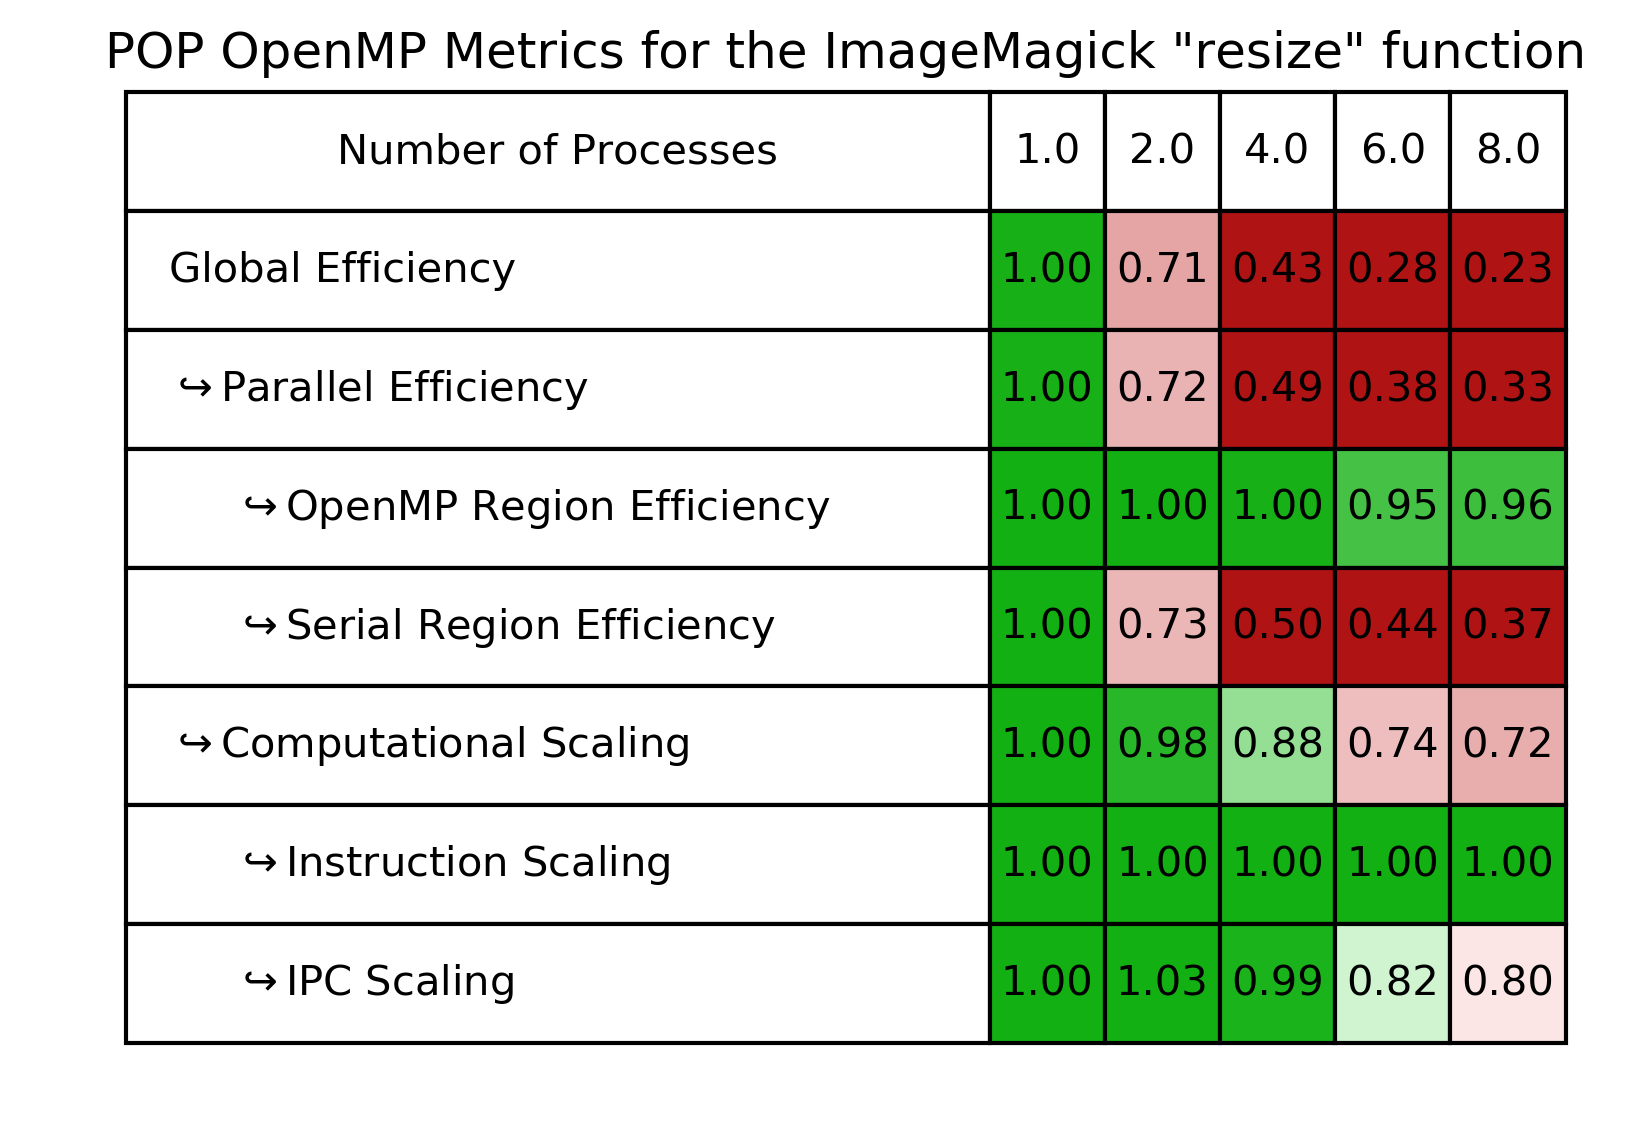

In [6]:
metric_table = metrics.plot_table(title="POP OpenMP Metrics for the ImageMagick \"resize\" function")
display(metric_table)

## Plotting Scaling

Scaling can be plotted similarly using the scaling plot routines:

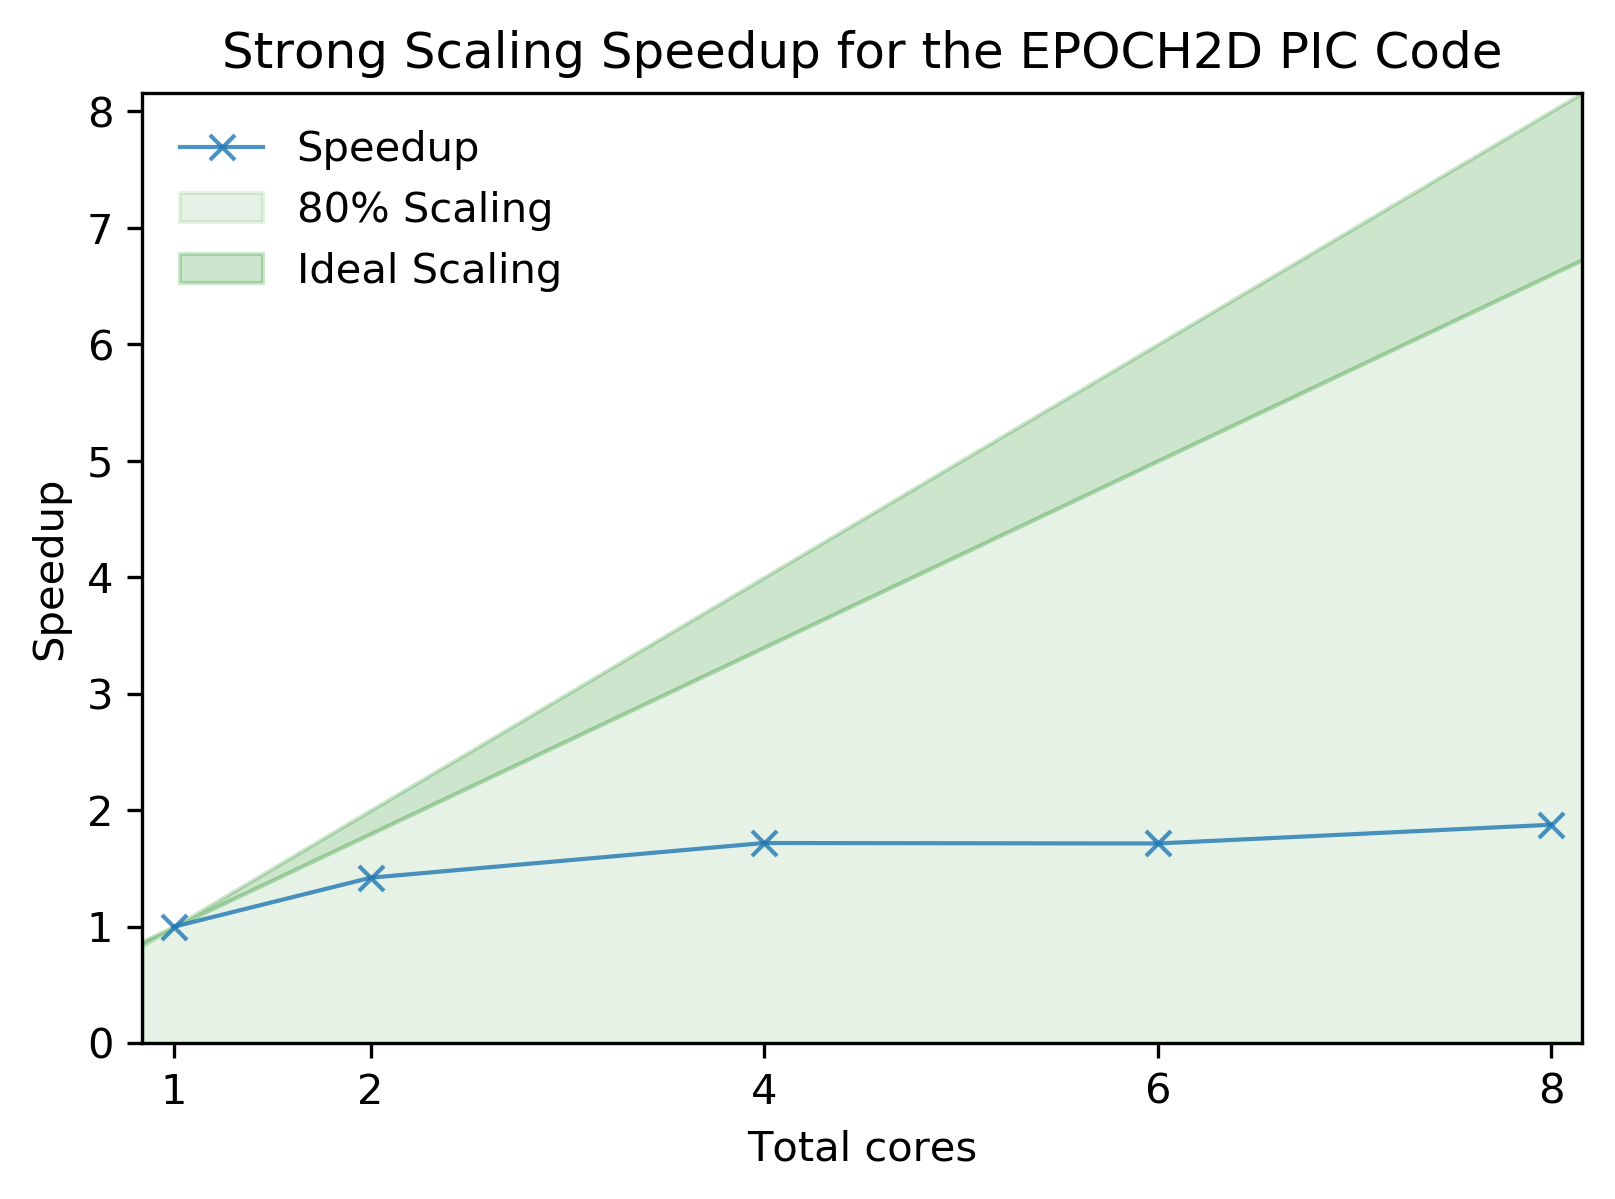

In [7]:
scaling_plot = metrics.plot_scaling(title="Strong Scaling Speedup for the EPOCH2D PIC Code")
display(scaling_plot)

# Advanced usage: getting to the data

The actual data can be recovered from the statistics object using one of the `by_*` functions. For example `by_commsize` returns a dictionary containing the results for all the runs (as RunData objects) identified by their MPI commsize.

In [11]:
dict_by_tpp = statistics.by_threads_per_process()

display(dict_by_tpp)

{1: <pypop.traceset.RunData at 0x7f46e1f2eda0>,
 2: <pypop.traceset.RunData at 0x7f46e1f4aeb8>,
 4: <pypop.traceset.RunData at 0x7f46e1f4ae80>,
 6: <pypop.traceset.RunData at 0x7f46e1f4add8>,
 8: <pypop.traceset.RunData at 0x7f46e1ebd668>}

### Accessing the statistics data

The RunData objects contain both metadata about the run and the calculated statistics used to build the metrics.  The actual statistics are contained in a pandas dataframe `RunData.stats`

These can be viewed directly if desired. e.g for the 8 rank case:

In [12]:
display(dict_by_tpp)

{1: <pypop.traceset.RunData at 0x7f46e1f2eda0>,
 2: <pypop.traceset.RunData at 0x7f46e1f4aeb8>,
 4: <pypop.traceset.RunData at 0x7f46e1f4ae80>,
 6: <pypop.traceset.RunData at 0x7f46e1f4add8>,
 8: <pypop.traceset.RunData at 0x7f46e1ebd668>}

### Accessing the metrics data

The metrics behave similarly, the primary difference being that the superclass `MetricSet` is subclassed to provide both pure MPI (`MPI_Metrics`) as well as hybrid metrics (`MPI_OpenMP_Metrics`). The raw metrics data is accessible as a pandas dataframe `MetricSet.metric_data`.

In [13]:
display(metrics.metric_data)

,Number of Processes,OpenMP Region Efficiency,Serial Region Efficiency,Parallel Efficiency,IPC Scaling,Instruction Scaling,Frequency Scaling,Computational Scaling,Global Efficiency,Speedup,Runtime
1,1.0,0.998414,1.000000,0.995348,1.000000,1.000000,1.000000,1.000000,0.995348,1.000000,1.474657e+10
2,2.0,0.998448,0.728963,0.723112,1.033760,0.999995,0.988037,0.977705,0.706990,1.420588,1.038061e+10
4,4.0,0.995565,0.498454,0.488539,0.988716,0.999995,0.932716,0.875288,0.427612,1.718442,8.581358e+09
6,6.0,0.951526,0.438806,0.384788,0.822290,0.999995,0.913411,0.739129,0.284408,1.714422,8.601480e+09
8,8.0,0.957615,0.373220,0.325171,0.796799,0.999994,0.910853,0.717507,0.233313,1.875224,7.863894e+09
